In [ ]:
import matplotlib.pylab as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
keras=tf.keras    
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

# WOODLAND

In [ ]:
#path = "data/woodlands_query_data_all.csv"
path = "woodlands_query_data_all.csv"
all_data = pd.read_csv(path)
dataset = all_data.iloc[:-20,0:]
test=all_data.iloc[-20:,0:]
dataset['date'] = pd.to_datetime(dataset['date'])
print("train","test","all")
print(len(dataset),len(test),len(all_data))
dataset.head()

train test all
409 20 429


,date,sales
0,2020-07-01,34
1,2020-07-02,36
2,2020-07-03,20
3,2020-07-04,17
4,2020-07-05,26


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['date'])
indexedDataset = indexedDataset.resample('1D').mean().interpolate()
indexedDataset.head(5)

,sales
date,
2020-07-01,34.0
2020-07-02,36.0
2020-07-03,20.0
2020-07-04,17.0
2020-07-05,26.0


In [ ]:
test['date'] = pd.to_datetime(test['date'],infer_datetime_format=True) #convert from string to datetime
testindexedDataset = test.set_index(['date'])
testindexedDataset = testindexedDataset.resample('1D').mean().interpolate()
testindexedDataset.head(5)

,sales
date,
2022-02-16,7528.0
2022-02-17,6620.0
2022-02-18,5496.0
2022-02-19,4408.0
2022-02-20,5500.0


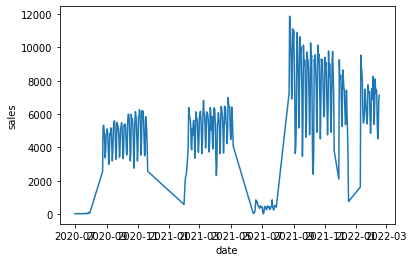

In [ ]:
## plot graph
plt.xlabel('date')
plt.ylabel('sales')
plt.plot(indexedDataset)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(indexedDataset)
scaled_train_data = scaler.transform(indexedDataset)
scaled_test_data = scaler.transform(testindexedDataset)

In [ ]:
scaled_train_data

array([[1.43472023e-03],
       [1.60351084e-03],
       [2.53185923e-04],
       [0.00000000e+00],
       [7.59557769e-04],
       [1.77230146e-03],
       [1.18153431e-03],
       [1.18153431e-03],
       [2.10988269e-03],
       [2.02548738e-03],
       [8.43953076e-05],
       [1.43472023e-03],
       [1.35032492e-03],
       [1.77230146e-03],
       [1.09713900e-03],
       [2.44746392e-03],
       [1.60351084e-03],
       [7.59557769e-04],
       [9.28348384e-04],
       [2.02548738e-03],
       [2.10988269e-03],
       [2.61625454e-03],
       [2.53185923e-03],
       [3.62899823e-03],
       [5.90767153e-04],
       [1.01274369e-03],
       [4.47295130e-03],
       [8.10194953e-03],
       [4.30416069e-03],
       [4.21976538e-03],
       [1.26086590e-02],
       [2.09975525e-02],
       [2.93864461e-02],
       [3.77753397e-02],
       [4.61642333e-02],
       [5.45531268e-02],
       [6.29420204e-02],
       [7.13309140e-02],
       [7.97198076e-02],
       [8.81087012e-02],


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1 # 2 or more
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#lstm_model.fit_generator(generator,epochs=3)
#lstm_model.fit_generator(generator,epochs=15)
# lstm_model.fit_generator(generator,epochs=12)
lstm_model.fit_generator(generator,epochs=14)

Epoch 1/14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


583/583 [==============================] - 16s 22ms/step - loss: 0.0203
Epoch 2/14
583/583 [==============================] - 23s 39ms/step - loss: 0.0151
Epoch 3/14
583/583 [==============================] - 12s 21ms/step - loss: 0.0133
Epoch 4/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0114
Epoch 5/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0101
Epoch 6/14
583/583 [==============================] - 13s 21ms/step - loss: 0.0077
Epoch 7/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0066
Epoch 8/14
583/583 [==============================] - 12s 21ms/step - loss: 0.0059
Epoch 9/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0059
Epoch 10/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0052
Epoch 11/14
583/583 [==============================] - 13s 23ms/step - loss: 0.0055
Epoch 12/14
583/583 [==============================] - 13s 22ms/step - loss: 0.0055
Epoch 13/14


Epochs -> 3

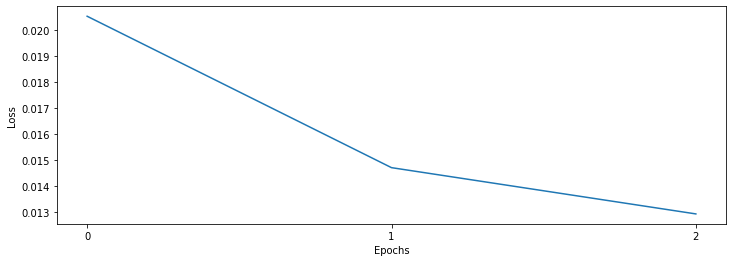

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

Epcohs -> 5 (Don't run for epoch 3)

In [ ]:
lstm_model.fit_generator(generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


583/583 [==============================] - 9s 12ms/step - loss: 0.0193
Epoch 2/5
583/583 [==============================] - 7s 12ms/step - loss: 0.0155
Epoch 3/5
583/583 [==============================] - 7s 12ms/step - loss: 0.0134
Epoch 4/5
583/583 [==============================] - 7s 12ms/step - loss: 0.0113
Epoch 5/5
583/583 [==============================] - 7s 11ms/step - loss: 0.0091


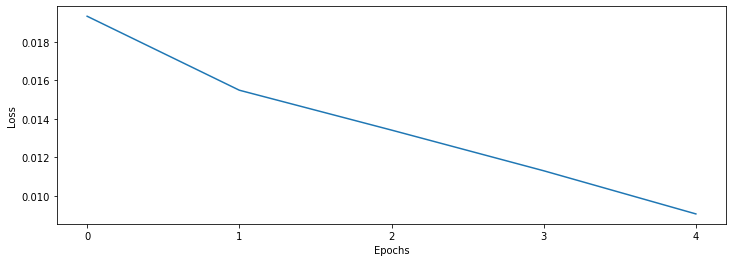

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

# Epochs -> 8

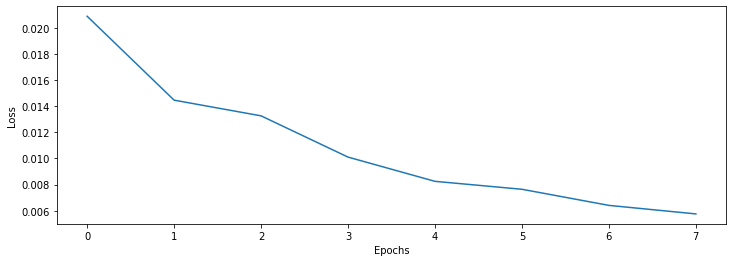

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

## For epochs - 12

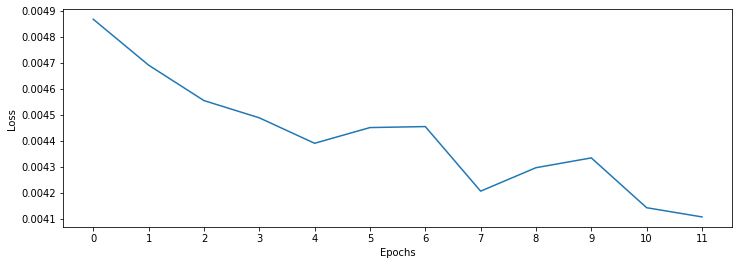

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

## For epochs - 14

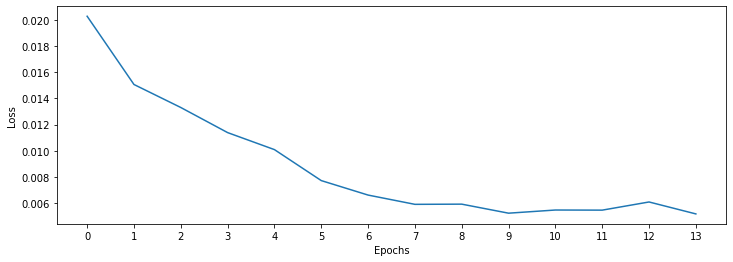

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

## For epochs - 15

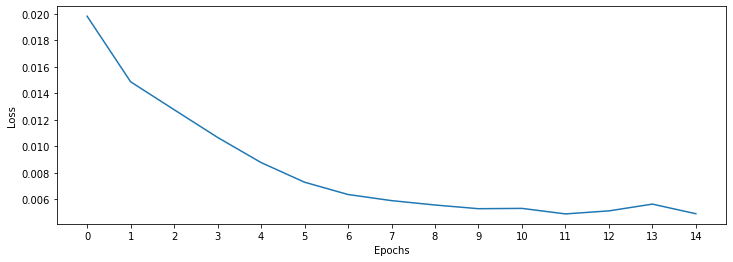

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
scaled_train_data

array([[1.43472023e-03],
       [1.60351084e-03],
       [2.53185923e-04],
       [0.00000000e+00],
       [7.59557769e-04],
       [1.77230146e-03],
       [1.18153431e-03],
       [1.18153431e-03],
       [2.10988269e-03],
       [2.02548738e-03],
       [8.43953076e-05],
       [1.43472023e-03],
       [1.35032492e-03],
       [1.77230146e-03],
       [1.09713900e-03],
       [2.44746392e-03],
       [1.60351084e-03],
       [7.59557769e-04],
       [9.28348384e-04],
       [2.02548738e-03],
       [2.10988269e-03],
       [2.61625454e-03],
       [2.53185923e-03],
       [3.62899823e-03],
       [5.90767153e-04],
       [1.01274369e-03],
       [4.47295130e-03],
       [8.10194953e-03],
       [4.30416069e-03],
       [4.21976538e-03],
       [1.26086590e-02],
       [2.09975525e-02],
       [2.93864461e-02],
       [3.77753397e-02],
       [4.61642333e-02],
       [5.45531268e-02],
       [6.29420204e-02],
       [7.13309140e-02],
       [7.97198076e-02],
       [8.81087012e-02],


In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))
print(current_batch)
for i in range(len(testindexedDataset)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    print(lstm_predictions_scaled)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

[[[0.58764453]
  [0.45294962]
  [0.5521985 ]
  [0.68284243]
  [0.611444  ]
  [0.62832307]
  [0.61735168]
  [0.45902608]
  [0.37969449]
  [0.39252258]
  [0.58123048]
  [0.60114778]]]
[array([0.58583343], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=float32), array([0.45590603], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=float32), array([0.45590603], dtype=float32), array([0.38467988], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=float32), array([0.45590603], dtype=float32), array([0.38467988], dtype=float32), array([0.44765404], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=float32), array([0.45590603], dtype=float32), array([0.38467988], dtype=float32), array([0.44765404], dtype=float32), array([0.6220037], dtype=float32)]
[array([0.58583343], dtype=float32), array([0.5364928], dtype=

In [ ]:
current_batch

array([[[0.56003952],
        [0.45685515],
        [0.41241026],
        [0.53168386],
        [0.68697655],
        [0.68964911],
        [0.65207839],
        [0.5672214 ],
        [0.45074502],
        [0.44953611],
        [0.62897593],
        [0.72611082]]])

In [ ]:
lstm_predictions_scaled

[array([0.5580399], dtype=float32),
 array([0.46827692], dtype=float32),
 array([0.3614999], dtype=float32),
 array([0.29183024], dtype=float32),
 array([0.33423728], dtype=float32),
 array([0.4974184], dtype=float32),
 array([0.5161013], dtype=float32),
 array([0.4910015], dtype=float32),
 array([0.43615687], dtype=float32),
 array([0.3500347], dtype=float32),
 array([0.28815818], dtype=float32),
 array([0.32926083], dtype=float32),
 array([0.46945614], dtype=float32),
 array([0.4925831], dtype=float32),
 array([0.47248673], dtype=float32),
 array([0.42150545], dtype=float32),
 array([0.3406809], dtype=float32),
 array([0.28278464], dtype=float32),
 array([0.3223601], dtype=float32),
 array([0.45131516], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[6629.21481824],
       [5565.6132006 ],
       [4300.41238129],
       [3474.89653367],
       [3977.37750119],
       [5910.91066456],
       [6132.28431219],
       [5834.87661684],
       [5185.02274001],
       [4164.56132317],
       [3431.38625503],
       [3918.41152859],
       [5579.58575815],
       [5853.61710483],
       [5615.49531579],
       [5011.4180913 ],
       [4053.72795135],
       [3367.71520871],
       [3836.64480549],
       [5364.63338494]])

In [ ]:
testindexedDataset['LSTM_Predictions'] = lstm_predictions
testindexedDataset

,sales,LSTM_Predictions
date,,
2022-02-16,7528.0,6629.214818
2022-02-17,6620.0,5565.613201
2022-02-18,5496.0,4300.412381
2022-02-19,4408.0,3474.896534
2022-02-20,5500.0,3977.377501
2022-02-21,7032.0,5910.910665
2022-02-22,7108.0,6132.284312
2022-02-23,7578.0,5834.876617
2022-02-24,6316.0,5185.022740


For Epochs 3

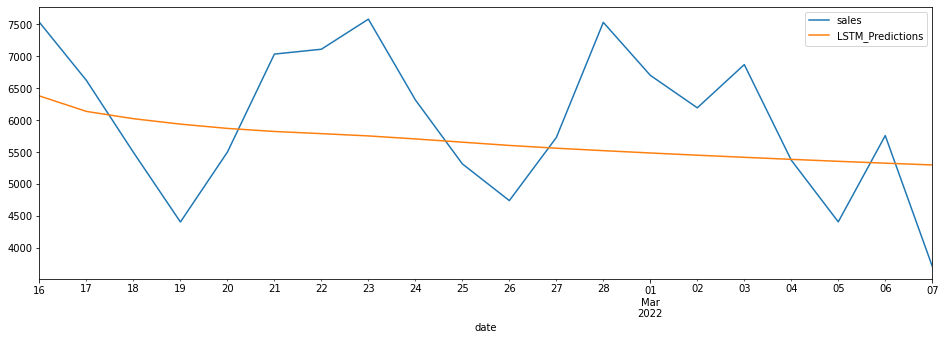

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

For Epochs 5

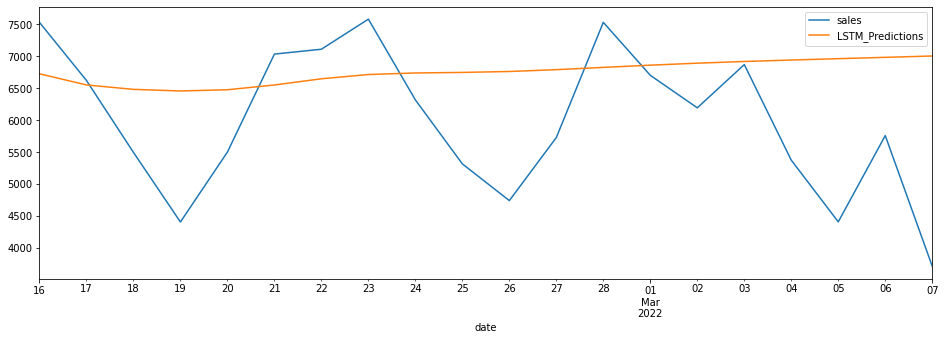

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

# For Epochs - 8

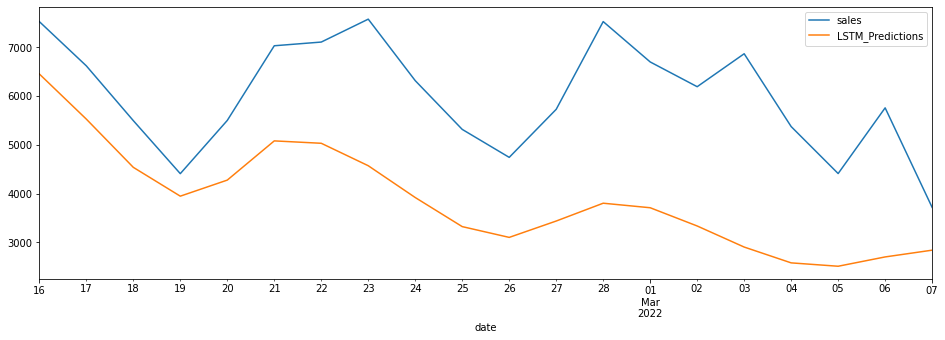

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

## For Epochs - 12

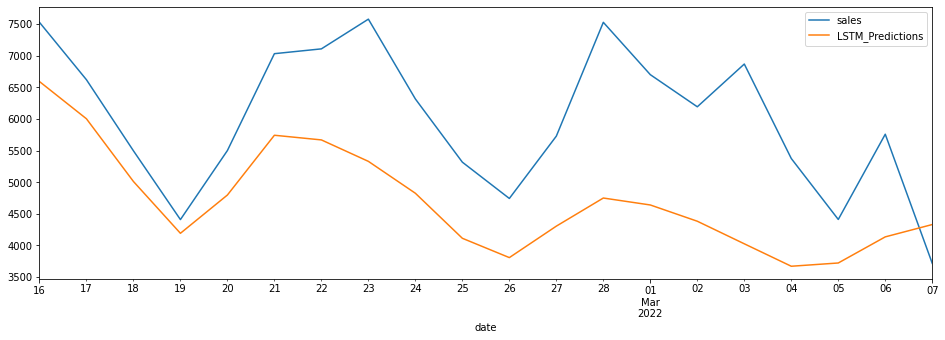

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

## For Epochs - 14

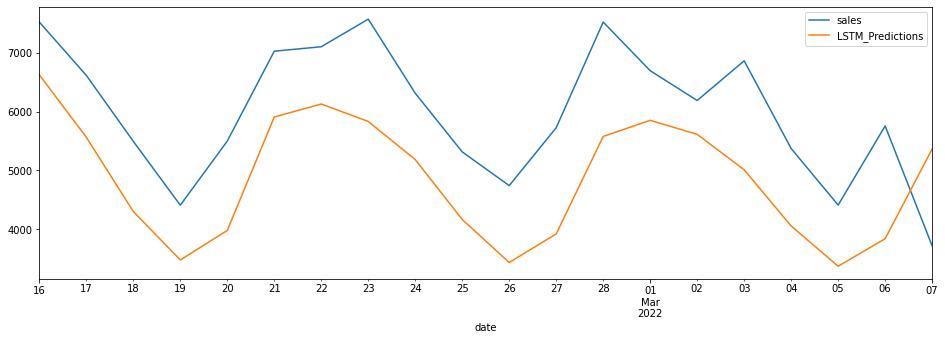

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

# For Epochs - 15

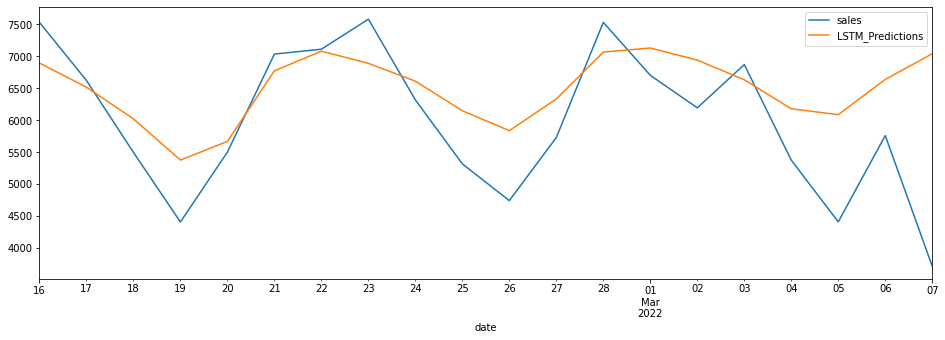

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

In [ ]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(testindexedDataset['sales'], testindexedDataset["LSTM_Predictions"], squared=False)
rms # 1091.65881913348 - 3 epochs
rms # 1666.4255525163755 - 8 epochs
rms # 1024.9930663827258 - 5 epochs
# lstm_rmse_error = rmse(testindexedDataset['sales'], testindexedDataset["LSTM_Predictions"])
# lstm_mse_error = lstm_rmse_error**2
# mean_value = testindexedDataset['sales'].mean()

# print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

1024.9930663827258

#MCNUT

In [ ]:
path = "mcnutt_query_data_all.csv"
all_data = pd.read_csv(path)
dataset = all_data.iloc[:-20,0:]
test=all_data.iloc[-20:,0:]
dataset['date'] = pd.to_datetime(dataset['date'])
print("train","test","all")
print(len(dataset),len(test),len(all_data))
dataset.head()

train test all
150 20 170


,date,sales
0,2021-08-23,7900
1,2021-08-24,14000
2,2021-08-25,13468
3,2021-08-26,12244
4,2021-08-27,10024


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['date'])
indexedDataset = indexedDataset.resample('1D').mean().interpolate()
indexedDataset.head(5)

test['date'] = pd.to_datetime(test['date'],infer_datetime_format=True) #convert from string to datetime
testindexedDataset = test.set_index(['date'])
testindexedDataset = testindexedDataset.resample('1D').mean().interpolate()
testindexedDataset.head(5)

,sales
date,
2022-02-16,12422.0
2022-02-17,11016.0
2022-02-18,9268.0
2022-02-19,8036.0
2022-02-20,9704.0


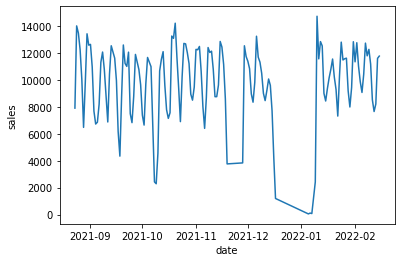

In [ ]:
## plot graph
plt.xlabel('date')
plt.ylabel('sales')
plt.plot(indexedDataset)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(indexedDataset)
scaled_train_data = scaler.transform(indexedDataset)
scaled_test_data = scaler.transform(testindexedDataset)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#lstm_model.fit_generator(generator,epochs=15)
#lstm_model.fit_generator(generator,epochs=18)
lstm_model.fit_generator(generator,epochs=20)
#lstm_model.fit_generator(generator,epochs=22)
#lstm_model.fit_generator(generator,epochs=21)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


165/165 [==============================] - 10s 61ms/step - loss: 0.0125
Epoch 2/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0122
Epoch 3/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0121
Epoch 4/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0113
Epoch 5/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0112
Epoch 6/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0115
Epoch 7/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0125
Epoch 8/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0113
Epoch 9/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0120
Epoch 10/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0115
Epoch 11/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0113
Epoch 12/20
165/165 [==============================] - 4s 23ms/step - loss: 0.0119
Epoch 13/20
165/165 [==

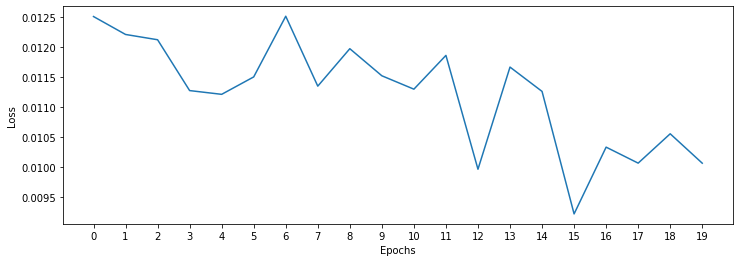

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(testindexedDataset)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions_scaled

[array([0.775719], dtype=float32),
 array([0.67021155], dtype=float32),
 array([0.50960374], dtype=float32),
 array([0.44389415], dtype=float32),
 array([0.596144], dtype=float32),
 array([0.81732], dtype=float32),
 array([0.8268627], dtype=float32),
 array([0.7885832], dtype=float32),
 array([0.66585284], dtype=float32),
 array([0.4911896], dtype=float32),
 array([0.46161294], dtype=float32),
 array([0.6464689], dtype=float32),
 array([0.82928187], dtype=float32),
 array([0.83563226], dtype=float32),
 array([0.78694695], dtype=float32),
 array([0.65125376], dtype=float32),
 array([0.4759572], dtype=float32),
 array([0.48344886], dtype=float32),
 array([0.69239813], dtype=float32),
 array([0.8361288], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[11427.14322519],
       [ 9879.9822216 ],
       [ 7524.82922554],
       [ 6561.26378441],
       [ 8793.85591745],
       [12037.18032169],
       [12177.1145277 ],
       [11615.78432417],
       [ 9816.0661149 ],
       [ 7254.80428028],
       [ 6821.09214973],
       [ 9531.81962395],
       [12212.5892911 ],
       [12305.7115283 ],
       [11591.79010916],
       [ 9601.9851346 ],
       [ 7031.4365983 ],
       [ 7141.29412746],
       [10205.32619143],
       [12312.99230242]])

In [ ]:
testindexedDataset['LSTM_Predictions'] = lstm_predictions
testindexedDataset

,sales,LSTM_Predictions
date,,
2022-02-16,12422.0,11427.143225
2022-02-17,11016.0,9879.982222
2022-02-18,9268.0,7524.829226
2022-02-19,8036.0,6561.263784
2022-02-20,9704.0,8793.855917
2022-02-21,13214.0,12037.180322
2022-02-22,13116.0,12177.114528
2022-02-23,13104.0,11615.784324
2022-02-24,11106.0,9816.066115


# Epochs - 15

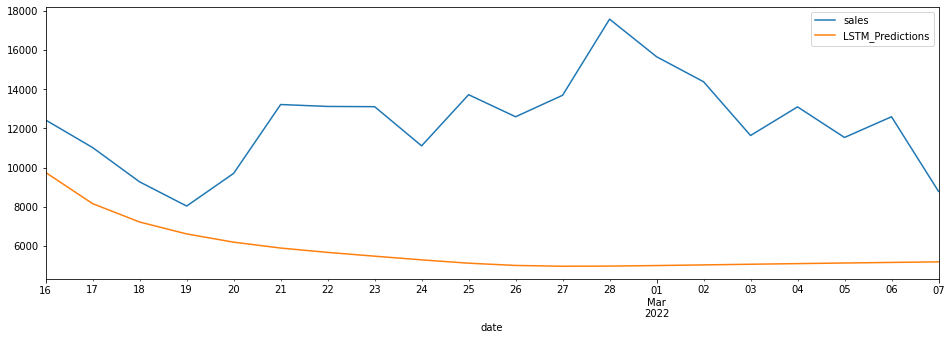

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

# Epochs - 18

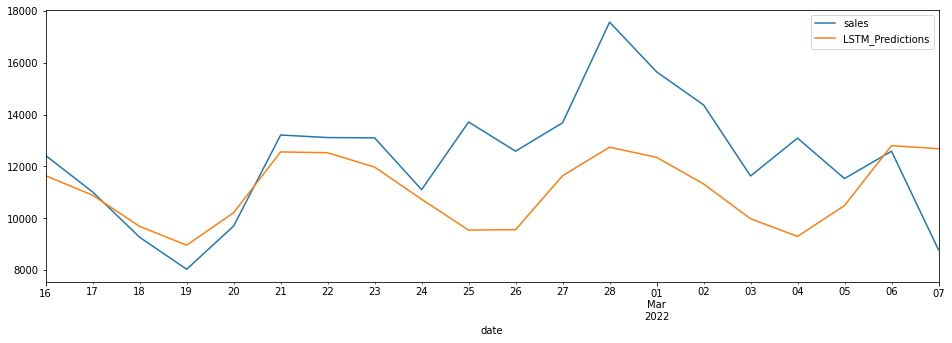

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

# Epochs - 20

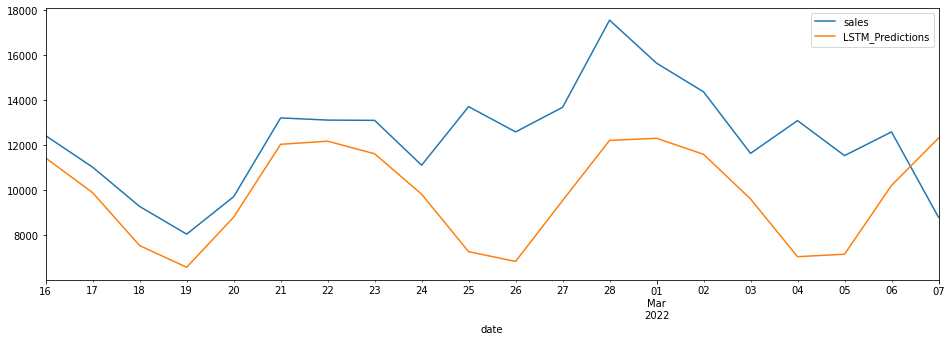

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

#Epochs - 21

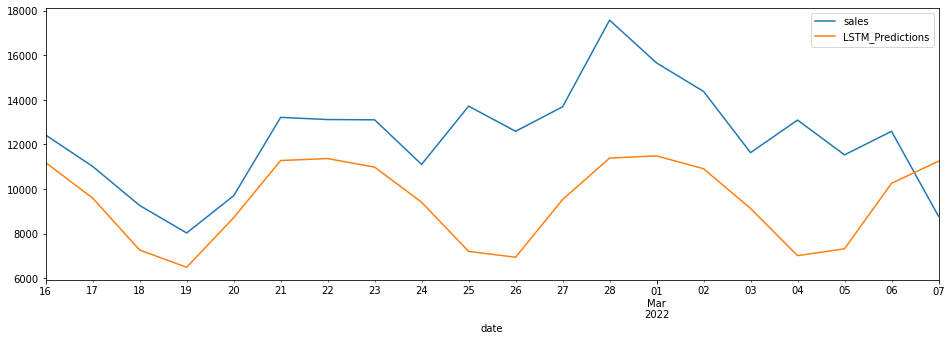

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

# Epochs - 22

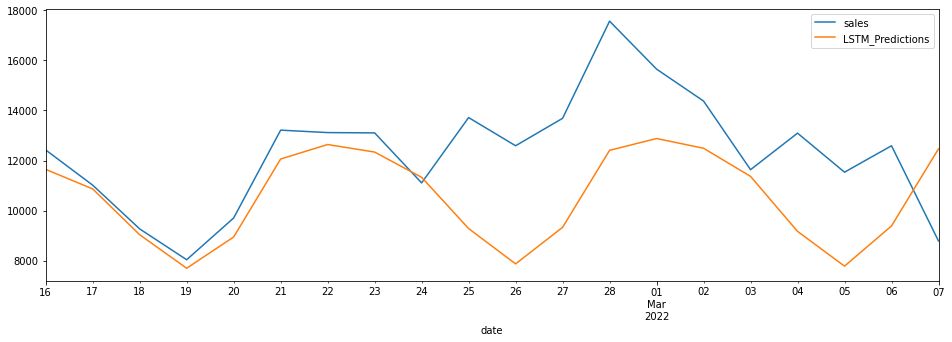

In [ ]:
testindexedDataset['sales'].plot(figsize = (16,5), legend=True)
testindexedDataset['LSTM_Predictions'].plot(legend = True);

In [ ]:
# https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887
# https://medium.com/analytics-vidhya/time-series-analysis-using-arima-and-lstm-in-python-and-keras-part1-f987e11f9f8c
# https://medium.com/analytics-vidhya/time-series-analysis-using-arima-and-lstm-in-python-and-keras-part2-74a79636568
# https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial/notebook
# https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima/notebook